In [1]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary
!pip install -qqq torch-lr-finder

In [18]:
!git clone https://github.com/hassiahk/train-your-model-pytorch.git

Cloning into 'train-your-model-pytorch'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 60 (delta 25), reused 48 (delta 16), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [1]:
cd train-your-model-pytorch/

/content/training_pytorch


In [2]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(1)

In [3]:
mean, std = calculate_mean_std("CIFAR10")
mean, std

Files already downloaded and verified


(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [4]:
from utils.transforms import apply_transforms_custom_resnet
train_transforms, test_transforms = apply_transforms_custom_resnet(mean, std)

In [5]:
from torchvision import datasets

train_dataset = datasets.CIFAR10(root='data/', train=True, download=False, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=test_transforms)

In [6]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False, pin_memory=True, num_workers=2)

In [7]:
labels = train_dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

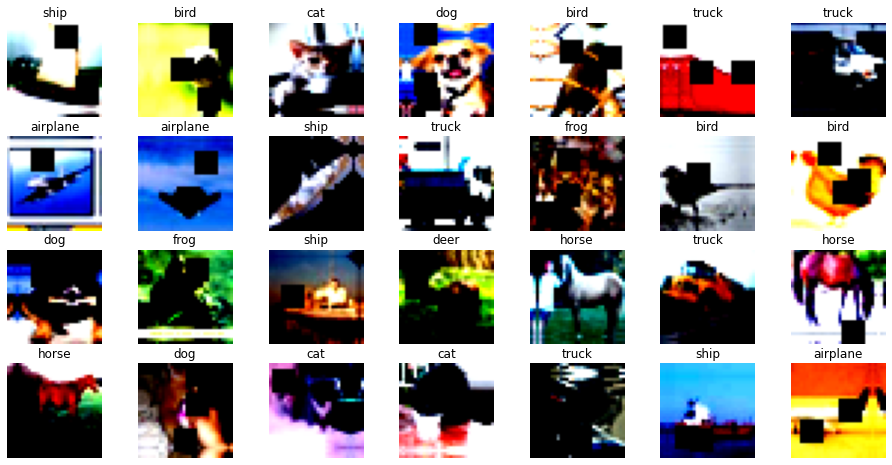

In [8]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

In [9]:
device = get_default_device()
device

device(type='cuda')

In [10]:
from models.custom_resnet import CustomResNet
from utils.helper import model_summary

model = CustomResNet("BN").to(device)

model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-14            [-1, 25

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 24
lr = 0.001
l1_factor = 0
max_epoch = 5

optimizer = optim.SGD(model.parameters(), lr=lr,momentum=0.9, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.16E-02


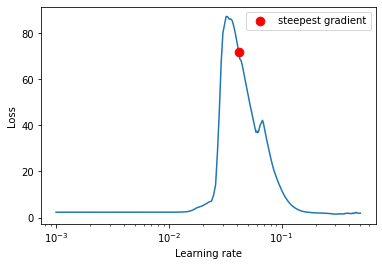

In [13]:
from utils.lr_finder import find_lr

max_lr = find_lr(model, train_loader, test_loader, epochs, optimizer, criterion, device)

In [13]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, max_lr[-1], max_epoch)

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch 1:


Train Loss=1.3631161451339722 Batch_id=97 LR= 0.00870 Train Accuracy= 39.89: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0025, Test Accuracy: 5538/10000 (55.38%)

Epoch 2:


Train Loss=1.013045310974121 Batch_id=97 LR= 0.01783 Train Accuracy= 56.82: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0019, Test Accuracy: 6607/10000 (66.07%)

Epoch 3:


Train Loss=0.7701219916343689 Batch_id=97 LR= 0.02911 Train Accuracy= 67.05: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0021, Test Accuracy: 6763/10000 (67.63%)

Epoch 4:


Train Loss=0.7693478465080261 Batch_id=97 LR= 0.03820 Train Accuracy= 72.62: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0015, Test Accuracy: 7487/10000 (74.87%)

Epoch 5:


Train Loss=0.5452260375022888 Batch_id=97 LR= 0.04163 Train Accuracy= 76.83: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0014, Test Accuracy: 7596/10000 (75.96%)

Epoch 6:


Train Loss=0.447982519865036 Batch_id=97 LR= 0.04134 Train Accuracy= 80.28: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0012, Test Accuracy: 7986/10000 (79.86%)

Epoch 7:


Train Loss=0.4033646881580353 Batch_id=97 LR= 0.04049 Train Accuracy= 82.96: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0012, Test Accuracy: 7984/10000 (79.84%)

Epoch 8:


Train Loss=0.3676537871360779 Batch_id=97 LR= 0.03910 Train Accuracy= 84.36: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0009, Test Accuracy: 8372/10000 (83.72%)

Epoch 9:


Train Loss=0.4020010530948639 Batch_id=97 LR= 0.03722 Train Accuracy= 85.69: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0010, Test Accuracy: 8380/10000 (83.80%)

Epoch 10:


Train Loss=0.40340906381607056 Batch_id=97 LR= 0.03489 Train Accuracy= 86.75: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0009, Test Accuracy: 8467/10000 (84.67%)

Epoch 11:


Train Loss=0.33864933252334595 Batch_id=97 LR= 0.03217 Train Accuracy= 88.12: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0008, Test Accuracy: 8602/10000 (86.02%)

Epoch 12:


Train Loss=0.3688940107822418 Batch_id=97 LR= 0.02914 Train Accuracy= 88.40: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0007, Test Accuracy: 8735/10000 (87.35%)

Epoch 13:


Train Loss=0.32747992873191833 Batch_id=97 LR= 0.02589 Train Accuracy= 89.74: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0008, Test Accuracy: 8619/10000 (86.19%)

Epoch 14:


Train Loss=0.31065699458122253 Batch_id=97 LR= 0.02250 Train Accuracy= 90.40: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0008, Test Accuracy: 8647/10000 (86.47%)

Epoch 15:


Train Loss=0.25632357597351074 Batch_id=97 LR= 0.01906 Train Accuracy= 91.34: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0007, Test Accuracy: 8744/10000 (87.44%)

Epoch 16:


Train Loss=0.2181011140346527 Batch_id=97 LR= 0.01567 Train Accuracy= 91.94: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0007, Test Accuracy: 8781/10000 (87.81%)

Epoch 17:


Train Loss=0.2187138795852661 Batch_id=97 LR= 0.01242 Train Accuracy= 92.78: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0007, Test Accuracy: 8823/10000 (88.23%)

Epoch 18:


Train Loss=0.17687594890594482 Batch_id=97 LR= 0.00940 Train Accuracy= 93.72: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0007, Test Accuracy: 8873/10000 (88.73%)

Epoch 19:


Train Loss=0.17309750616550446 Batch_id=97 LR= 0.00669 Train Accuracy= 95.10: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0006, Test Accuracy: 8939/10000 (89.39%)

Epoch 20:


Train Loss=0.11751209944486618 Batch_id=97 LR= 0.00437 Train Accuracy= 96.18: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0005, Test Accuracy: 9127/10000 (91.27%)

Epoch 21:


Train Loss=0.10728524625301361 Batch_id=97 LR= 0.00249 Train Accuracy= 97.25: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0005, Test Accuracy: 9135/10000 (91.35%)

Epoch 22:


Train Loss=0.05926457419991493 Batch_id=97 LR= 0.00112 Train Accuracy= 97.91: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0005, Test Accuracy: 9239/10000 (92.39%)

Epoch 23:


Train Loss=0.06890365481376648 Batch_id=97 LR= 0.00028 Train Accuracy= 98.50: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


: Average Test loss: 0.0005, Test Accuracy: 9256/10000 (92.56%)

Epoch 24:


Train Loss=0.06850629299879074 Batch_id=97 LR= 0.00000 Train Accuracy= 98.54: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]



: Average Test loss: 0.0004, Test Accuracy: 9269/10000 (92.69%)



Total wrong predictions are 731
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


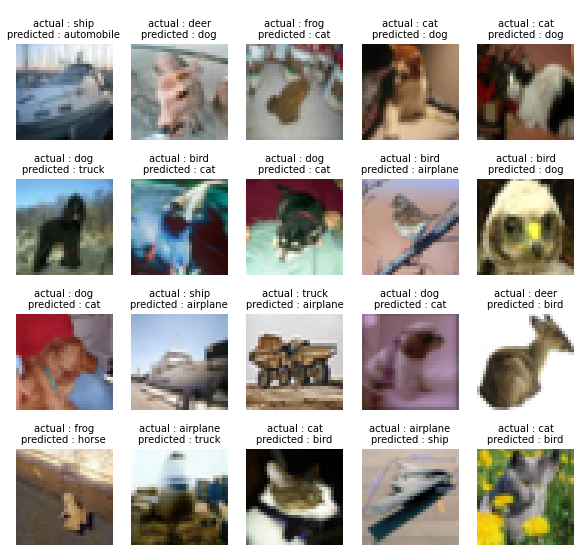

In [14]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device)

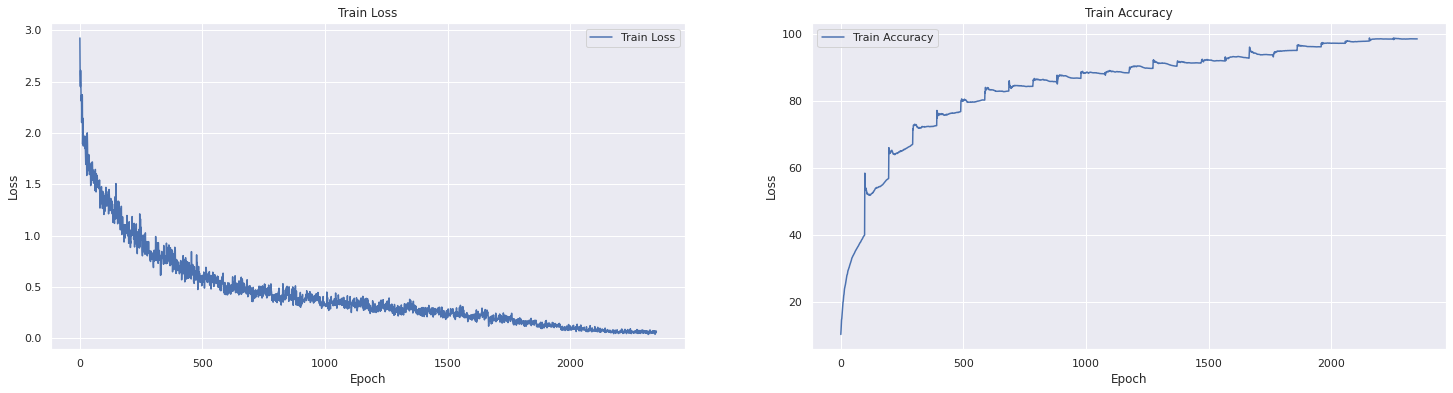

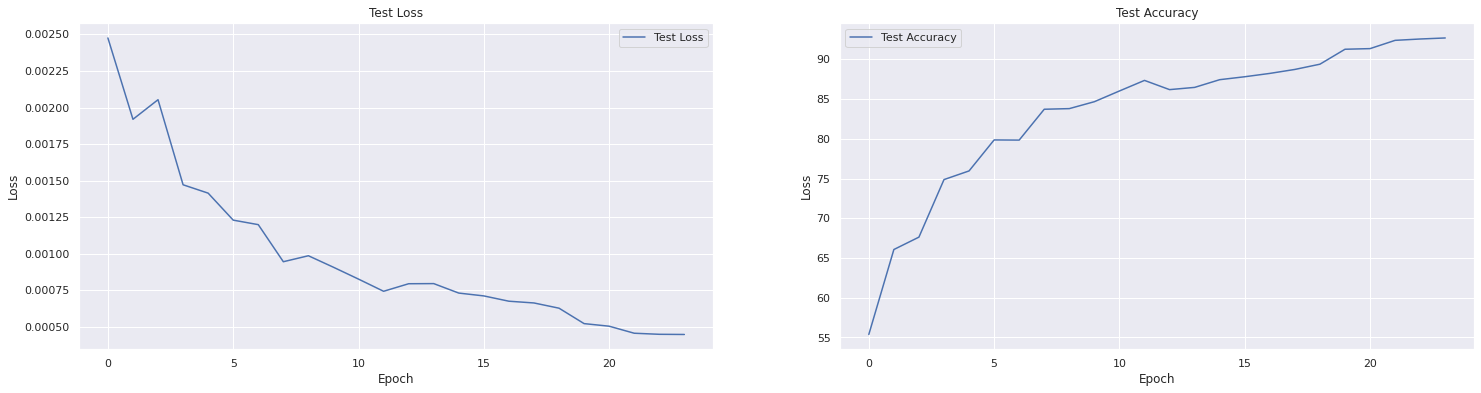

In [15]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [16]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of airplane : 94 %
Accuracy of automobile : 97 %
Accuracy of  bird : 88 %
Accuracy of   cat : 84 %
Accuracy of  deer : 92 %
Accuracy of   dog : 88 %
Accuracy of  frog : 96 %
Accuracy of horse : 94 %
Accuracy of  ship : 95 %
Accuracy of truck : 95 %


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for conv_layer_1
Generating Grad-CAM for conv_layer_2
Generating Grad-CAM for conv_layer_3


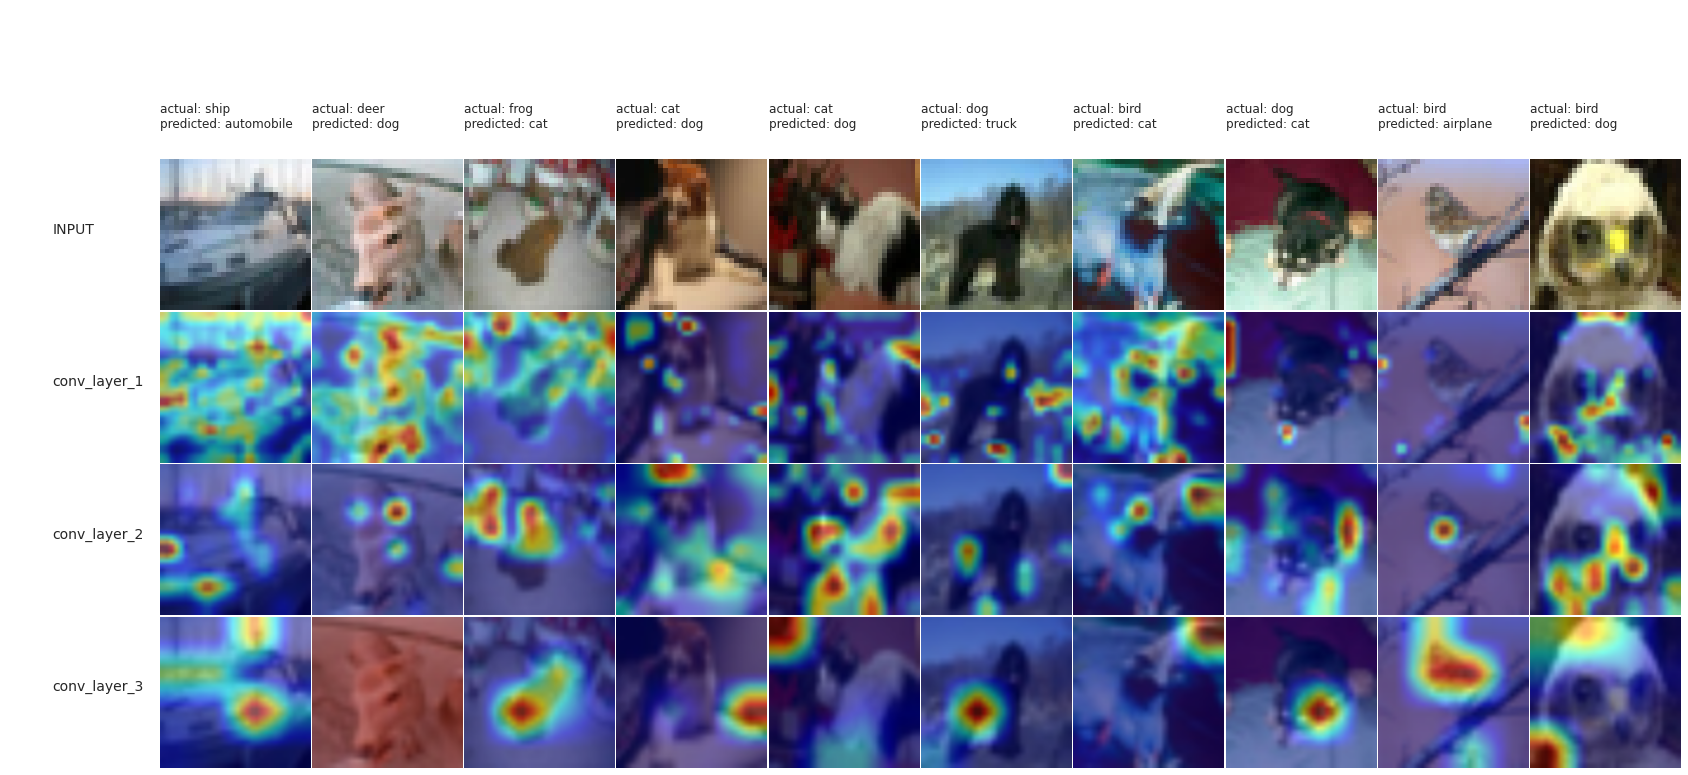

In [17]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["conv_layer_1", "conv_layer_2", "conv_layer_3"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])